# MACHINE LEARNING I

## Trabajo Práctico Integrador
### Título: "Word Happiness Report Analysis"

### Introducción

El presente informe corresponde al desarrollo de un clasificador binario que precidice si el puntaje de felicidad de un pais o región es alto o bajo, en función de ciertas feactures de entreda. Dado que dicho índice puede asumir valores entre 0 y 10 inclusive, el humbral considerado para dividir los puntajes entre altos y bajos es igual a 5.

Para este desarrollo se utilizó el dataset "Word Happiness Report", constituido por los reportes correspondientes a los años 2019-2015.

El desarrollo del clasificador se lleva a cabó siguiendo las siguientes etapas:
1. Análisis del dataset
2. Preparación del dataset
3. Ingeniería de Feactures
4. Aprendizaje y Entrenamieto de modelos
5. Evaluacion de la calidad de las predicciones

## 1. Análisis del dataset

El dataset se compone por una serie de archivos, organizados por año, que muestran por país o por región un puntaje reprensetan el nivel de felicidad de sus habitantes. Este puntaje pude asumir valores entre cero y 10, inclusive.
Primeramente se desea evaluar el formato de los archivos y sus las feactures consideradas año a año se mantiene son las mismas, o existen variaciones. Para ello, se carga en diferentes dataframes el dataset correspondiente a cada año y posteriormente se imprime en pantalla las característcas de cada uno, para poder comparar si su estructura es la misma.

In [266]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from dtreeviz.trees import dtreeviz

from xgboost import XGBClassifier

import itertools
import matplotlib.pyplot as plt

In [6]:
# carga del dataset distribuido en diferentes archivos

df_2019 = pd.read_csv("datasets/world_happiness_report/2019.csv")
df_2018 = pd.read_csv("datasets/world_happiness_report/2018.csv")
df_2017 = pd.read_csv("datasets/world_happiness_report/2017.csv")
df_2016 = pd.read_csv("datasets/world_happiness_report/2016.csv")
df_2015 = pd.read_csv("datasets/world_happiness_report/2015.csv")

In [7]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2015')
print('------------------------------------------------------------')
df_2015.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2015
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Gene

In [9]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2016')
print('------------------------------------------------------------')
df_2016.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2016
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trus

In [10]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2017')
print('------------------------------------------------------------')
df_2017.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2017
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trus

In [11]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2018')
print('------------------------------------------------------------')
df_2018.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2018
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [12]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2019')
print('------------------------------------------------------------')
df_2019.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2019
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [13]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [14]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [15]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [16]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [17]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Comparando las descripciones de los dataframes entre sí, se observan formatos diferentes:
- Los dataframes correspondientes a los años 2019 y 2018, presentan el mismo formato, compuesto por 9 feactures. El mismo será refenrecia más a delante como "formato 2019-2018".
- Mientras que los dataframes correspondientes a los años entre 2015 y 2017 inclusive, muestran algunas discrepancias entre sus formatos. Analizando conceptualmente una a una las feactures de cada uno, puede notarse que en los tres casos están presentes las mismas características que componen los dataframes de los años 2018 y 2019. De manera que es factible construir un único dataset que concentre los datos recavados durante el período 2015-2019.
     
Considerando ésto, a continuación se construirá un único data cuyas feactures serán las siguientes:     
    1 - Overall rank                
    2 - Country or region            
    3 - Score                        
    4 - GDP per capita               
    5 - Social support               
    6 - Healthy life expectancy      
    7 - Freedom to make life choices 
    8 - Generosity                   
    9 - Perceptions of corruption 
     
Antes de reodenar las características del dataset de los años 2015 a 2017, se debe verificar la compitibilidad entre las diferentes feactures de cada dataframe. Para ello se analizan los detalles estadísticos vinculados a cada una feacture.

In [480]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [18]:
df_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [19]:
df_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [20]:
df_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [21]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Comparando los datos estadísticos de las diferentes feactures de cada dataset, puede verse que si bien la etiqueta que la describe puede cambiar de un año con respecto al otro, su variación se mantiene acotada dentro de un mismo rango.
Así, se determinan las siguientes equivalencias entre feactures:

	---------------------------------|--------------------------------
			DataFrame 2015			|			DataFrame 2019
	---------------------------------|--------------------------------
	Happiness Rank                   |	Overall rank					
	Country                          |	Country or region              	
	Happiness Score                  |	Score                          	
	Economy (GDP per Capita)         |	GDP per capita                 	
	Family                           |	Social support                 	
	Health (Life Expectancy)         |	Healthy life expectancy        	
	Freedom                          |	Freedom to make life choices   	
	Generosity                       |	Generosity                     	
	Trust (Government Corruption)    |	Perceptions of corruption      	               
	---------------------------------|--------------------------------
    
	---------------------------------|--------------------------------
			DataFrame 2016			|			DataFrame 2019
	---------------------------------|--------------------------------
	Happiness Rank                   |	Overall rank					
	Country                          |	Country or region              	
	Happiness Score                  |	Score                          	
	Economy (GDP per Capita)         |	GDP per capita                 	
	Family                           |	Social support                 	
	Health (Life Expectancy)         |	Healthy life expectancy        	
	Freedom                          |	Freedom to make life choices   	
	Generosity                       |	Generosity                     	
	Trust (Government Corruption)    |	Perceptions of corruption      	               
	---------------------------------|--------------------------------	
	
	---------------------------------|--------------------------------
			DataFrame 2017			|			DataFrame 2019
	---------------------------------|--------------------------------
	Happiness.Rank                   |	Overall rank					
	Country                          |	Country or region              	
	Happiness.Score                  |	Score                          	
	Economy..GDP.per.Capita.         |	GDP per capita                 	
	Family                           |	Social support                 	
	Health..Life.Expectancy.         |	Healthy life expectancy        	
	Freedom                          |	Freedom to make life choices   	
	Generosity                       |	Generosity                     	
	Trust..Government.Corruption.    |	Perceptions of corruption      	        
	---------------------------------|--------------------------------	

Por otro lado, al comparar las estructuras de los datasets de cada año entre sí, se observa que hay feactures que estan presentes en un dataset y no en otro. Estas feactures serán descartadas, con el objetivo de counstruir una matriz densa que concentre solamente las feactures consideradas en cada uno de los años que compone el período 2015-2019.

## 2. Preparación del dataset

A contuniación se procede a reorganizar las feactures asociadas a cada año para finalmente construir una matriz densa correspondiente a todo el período 2015-2019. Dado que el formato del dataset de los años 2019 y 2018 son idénticos, se trabajará sobre los correspondientes a los años restantes para llevarlos al formato 2019-2018. Ésto requerirá realizar las siguienets operaciones:
- Descartar de cada dataset las feactures que no sean comunes al formato 2019-2018.
- Rrenormbrar aquellas feactures que tenga una etiqueta distinta que las del formato 2019-1018, pero muestren la misma información.
- Reordenar las columnas de acuerdo al formato 2018-2019.

In [80]:
df_2015_red = df_2015.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis = 1, inplace = False)

df_2015_rename = df_2015_red.rename(columns = {'Happiness Rank': 'Overall rank',
                                               'Country': 'Country or region',
                                               'Happiness Score': 'Score',
                                               'Economy (GDP per Capita)': 'GDP per capita',
                                               'Family': 'Social support',
                                               'Health (Life Expectancy)': 'Healthy life expectancy',
                                               'Freedom': 'Freedom to make life choices',
                                               'Generosity': 'Generosity',
                                               'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace = False)

df_2015_tidy = df_2015_rename[["Overall rank", "Country or region", "Score", "GDP per capita", "Social support", 
                               "Healthy life expectancy", "Freedom to make life choices", "Generosity", 
                               "Perceptions of corruption"]]

df_2015_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  158 non-null    int64  
 1   Country or region             158 non-null    object 
 2   Score                         158 non-null    float64
 3   GDP per capita                158 non-null    float64
 4   Social support                158 non-null    float64
 5   Healthy life expectancy       158 non-null    float64
 6   Freedom to make life choices  158 non-null    float64
 7   Generosity                    158 non-null    float64
 8   Perceptions of corruption     158 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


In [81]:
df_2016_red = df_2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis = 1, inplace = False)

df_2016_rename = df_2016_red.rename(columns = {'Happiness Rank': 'Overall rank',
                                               'Country': 'Country or region',
                                               'Happiness Score': 'Score',
                                               'Economy (GDP per Capita)': 'GDP per capita',
                                               'Family': 'Social support',
                                               'Health (Life Expectancy)': 'Healthy life expectancy',
                                               'Freedom': 'Freedom to make life choices',
                                               'Generosity': 'Generosity',
                                               'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace = False)

df_2016_tidy = df_2016_rename[["Overall rank", "Country or region", "Score","GDP per capita", "Social support",
                               "Healthy life expectancy", "Freedom to make life choices","Generosity", 
                               "Perceptions of corruption"]]

df_2016_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  157 non-null    int64  
 1   Country or region             157 non-null    object 
 2   Score                         157 non-null    float64
 3   GDP per capita                157 non-null    float64
 4   Social support                157 non-null    float64
 5   Healthy life expectancy       157 non-null    float64
 6   Freedom to make life choices  157 non-null    float64
 7   Generosity                    157 non-null    float64
 8   Perceptions of corruption     157 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


In [82]:
df_2017_red = df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis = 1, inplace = False)

df_2017_rename = df_2017_red.rename(columns = {'Happiness.Rank': 'Overall rank',
                                               'Country': 'Country or region',
                                               'Happiness.Score': 'Score',
                                               'Economy..GDP.per.Capita.': 'GDP per capita',
                                               'Family': 'Social support',
                                               'Health..Life.Expectancy.': 'Healthy life expectancy',
                                               'Freedom': 'Freedom to make life choices',
                                               'Generosity': 'Generosity',
                                               'Trust..Government.Corruption.': 'Perceptions of corruption'}, inplace = False)

df_2017_tidy = df_2017_rename[["Overall rank", "Country or region", "Score","GDP per capita", "Social support",
                               "Healthy life expectancy", "Freedom to make life choices","Generosity", 
                               "Perceptions of corruption"]]

df_2017_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  155 non-null    int64  
 1   Country or region             155 non-null    object 
 2   Score                         155 non-null    float64
 3   GDP per capita                155 non-null    float64
 4   Social support                155 non-null    float64
 5   Healthy life expectancy       155 non-null    float64
 6   Freedom to make life choices  155 non-null    float64
 7   Generosity                    155 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [83]:
frames = [df_2015_tidy, df_2016_tidy, df_2017_tidy, df_2018, df_2019]
df_years = pd.concat(frames, keys=['2015', '2016', '2017', '2018', '2019'])

De este modo queda ordanado el dataset con las mismas feactures consideradas para cada año. Tener el dataset ordenado de esta manera facilitará realizar cualquier análisis considerando cada año por separado.

In [84]:
df_years.loc['2015']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


También se construye otro datset en el cual no se incluye la referencia al año al que corresponden los datos. Éste será el dataset sobre el cual se trabajará durante el desarrollo del clasificador binario.

In [85]:
df = pd.concat(frames)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  782 non-null    int64  
 1   Country or region             782 non-null    object 
 2   Score                         782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social support                782 non-null    float64
 5   Healthy life expectancy       782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Generosity                    782 non-null    float64
 8   Perceptions of corruption     781 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 61.1+ KB


Teniendo ya conformada la matriz densa, se procedea realizar la limpieza de los valores nulls.

In [86]:
# Limpieza del dataset

df.isnull().sum()
nans = df.loc[df.isnull().sum(axis=1) >= 1, :]
print('Cantidad de filas NaN {}'.format(nans.shape[0]))
not_nans = df.loc[df.isnull().sum(axis=1) == 0, :]
print('Cantidad de filas sin NaN {}'.format(not_nans.shape[0]))
df_not_nans = not_nans

Cantidad de filas NaN 1
Cantidad de filas sin NaN 781


Podemos observar que existe un solo NaN entre 782 muestras, lo que representar un valor de 0,1 % del total. De manera que es posible eliminar esa muestra sin producir sesgo.
    
Se observa que las feactures en su mayoría son numéricas, a excepción de 'Country or region'. Esta feacture no será consideraba en el procesamiento, dado que el objetivo es poder predecir si el índice de felicidad correspondiente a un país o región es alto o bajo. 

Por otro lado, también se tiene la feacture 'Overall rank' que corresponde a un valor ordinal derivado del score y de la cantidad total de muestras. Esta feacture tampoco será descartada, por presentar información redundante al haber generado a partir del score.

Quedará así construido el dataset final exclusivamente por feactures numéricas, como se muestra a continuación.

In [87]:
df_num = df_not_nans.drop(['Country or region', 'Overall rank'], axis = 1, inplace = False)
df_num.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


## 3. Ingeniería de Feactures

En esta sección se desea analizar cuales son las carácterísticas que tiene mayor influencia sobre la salida, que en este caso es el Score o el Puntaje de la felicidad. Para ello se analiza la distribución que presenta esta variable a lo largo de todo el período considerado, y cómo es su correción con respecto a cada feacture de entreda.

A continuación se muestra el resultado del análisis estadísticos de los datos correspondientes a cada feacture del dataset fianl.

In [88]:
df_num.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,5.377232,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436
std,1.127071,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509000,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000
50%,5.321000,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000
75%,6.182000,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030
max,7.769000,1.870766,1.644000,1.141000,0.724000,0.838075,0.551910


Se analiza el histograma correspondiente a la salida Score.

(2.4392000821113538, 8.022799996089935, 0.0, 132.3)

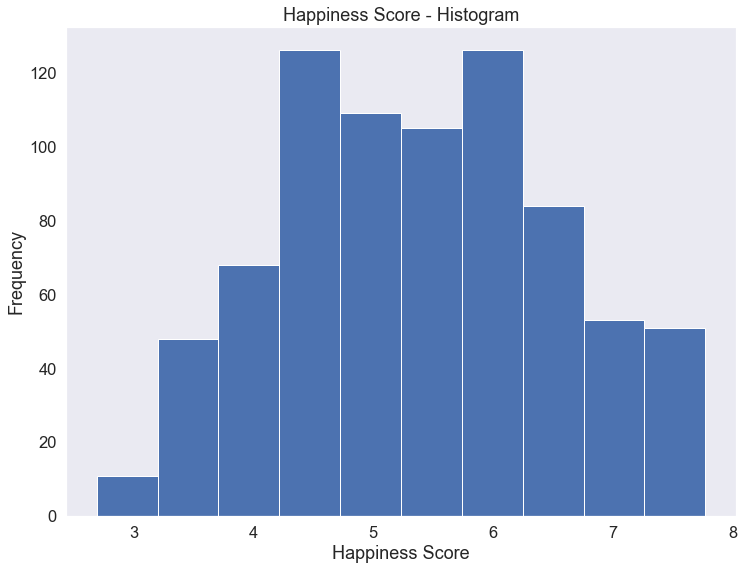

In [89]:
score = df_num.Score.to_numpy()
fig, ax = plt.subplots(1,figsize=(12,9))
ax.hist(score)
ax.set_title("Happiness Score - Histogram")
ax.set(ylabel='Frequency')
ax.set(xlabel='Happiness Score')
ax.grid()
ax.axis('on')

Considerando que el Score toma valores en el rango de 0 a 10, puede notarse que la distribución de los datos aproxima a una normal, con media igual a 5.377232. 

Se analiza la correlación que existe entre las feactures de entrada con la salida, utilizando el coeficiente de correlación de Pearson, y su resultado se representa mediante el gráfico heatmap mostrado a continuación.

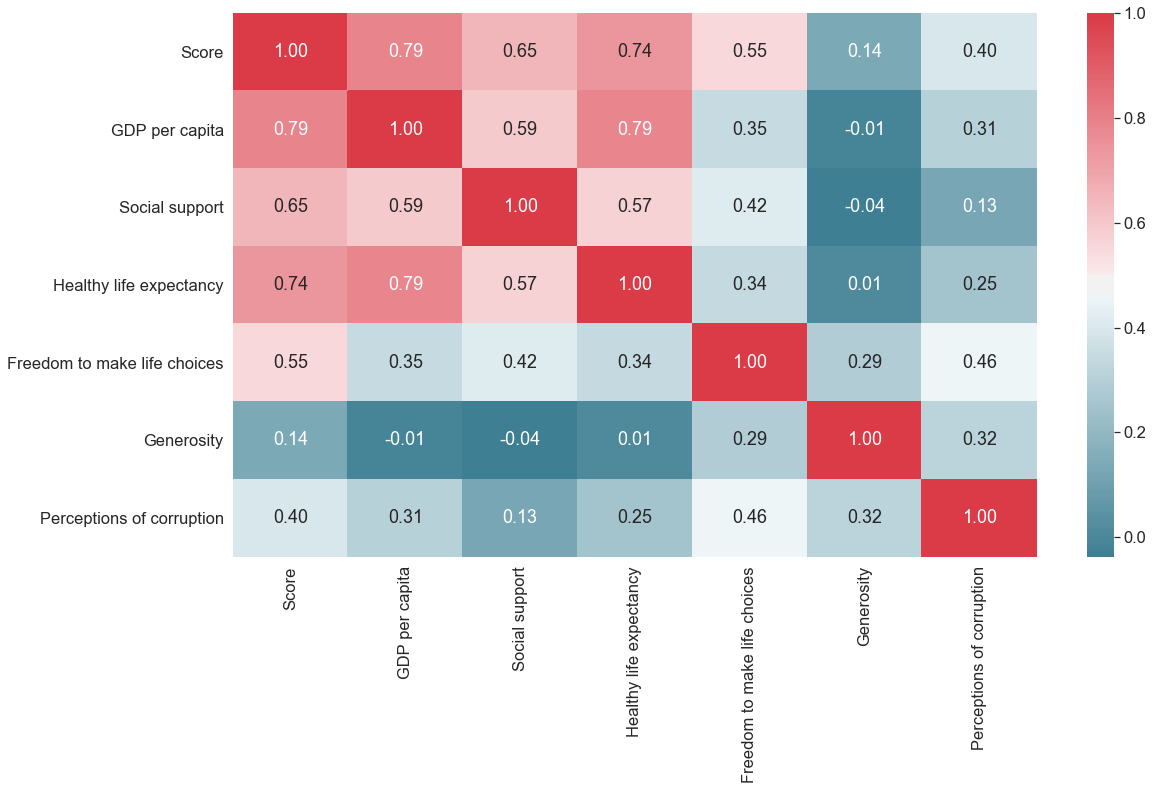

In [90]:
fig, ax1 = plt.subplots(1, figsize=(18, 10))
corr = df_num.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

En el gráfico anterior se observa la matriz de correlación cruzada de cada feacture contra las restantes. Auquellos valores máspróximos a 1 o a (-1) tendrá mayor correlación. Podemos ver que el Score está fuertemente relación 4 feactures:
- GDP per capita
- Healthy life expectancy
- Social support

Aquellas feactures que tienen un baja correlación con la salida, puede que al combinarse con otra termine influyendo fuertemente en la salida. Es por eso que las mismas también seran consideradas en el procesamiento.

Para crear un clasificador que evalúe si un determinado conjunto de feactures tendrá un Score superior 5, se crea una variable binaria denominada 'score_binary', y se la agrega al dataset como una nueva feacture. Será esta la variable de salida a considerar para el entrenamiento de los diferentes modelos mediante los cuales se implementará el clasificador.

Se analiza el histograma de esta salida binaria a los fines de determinar si el dataset está balanceado o no.

(-0.05000000000000001, 1.05, 0.0, 507.15)

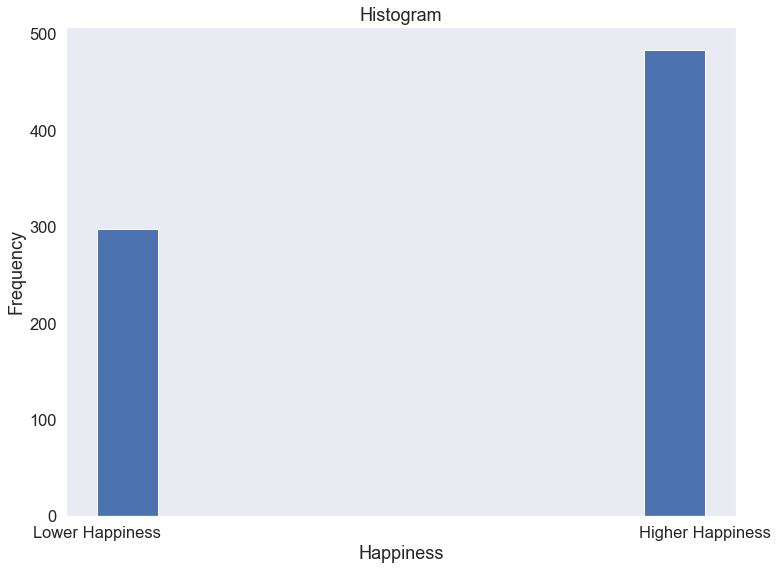

In [91]:
score_treshold = 5
df_num['score_binary'] = df_num.Score.apply(lambda label: 1 if (label > score_treshold) else 0)
score_binary = df_num.score_binary.to_numpy()

fig, ax = plt.subplots(1,figsize=(12,9))
ax.hist(df_num['score_binary'])
ax.set_title('Histogram')
ax.set(ylabel='Frequency')
ax.set(xlabel='Happiness')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Lower Happiness', 'Higher Happiness'])
ax.grid()
ax.axis('on')

Puede notarse claramente que el dataset está balanceado, concentrado aproximadamente un 62,5% de casos positivos (Score alto) y un 37,5% restante de casos negativos (Score Bajo).

También es útil analizar c{omo distribuya cada una de las feactures fuertemente relacionada con la salida para cada resultado del clasificador. Esta información se puede visualizar fácilmente mediante un gráfico bloxpot, como los que se muestran a continuación. 

[Text(0, 0, 'GDP per capita'),
 Text(0, 0, 'Social support'),
 Text(0, 0, 'Healthy life expectancy')]

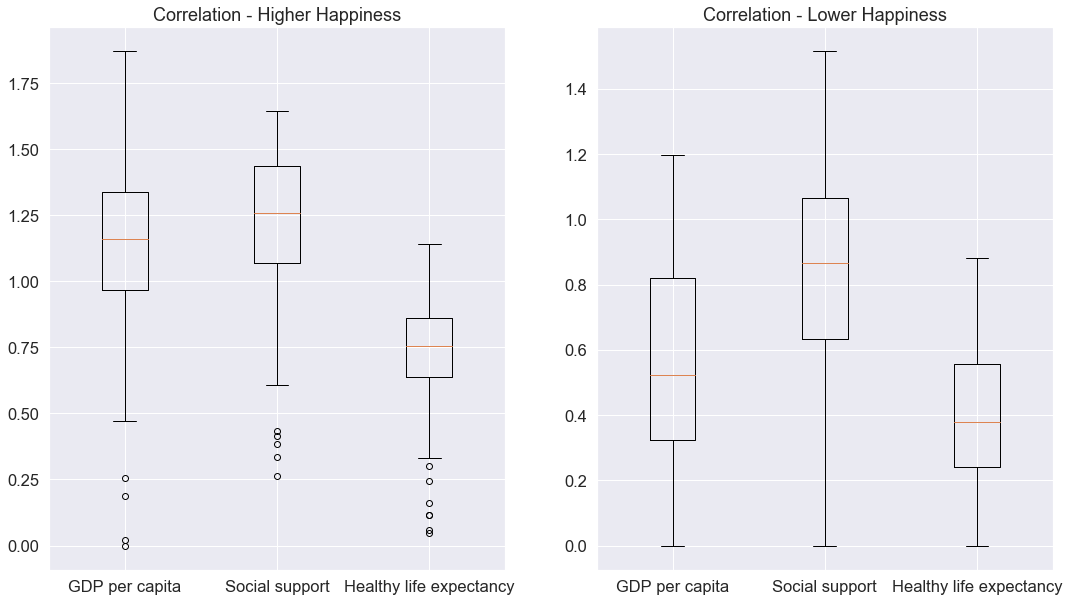

In [92]:
# bloxplot de las variables con mayor correlacion con el score_binary
corr = ['GDP per capita','Social support','Healthy life expectancy']

corr_plots_happy = []
corr_plots_unhappy = []

for x in corr:
    corr_plots_happy.append(df_num.loc[df_num['score_binary']==1,x])
    corr_plots_unhappy.append(df_num.loc[df_num['score_binary']==0,x])
    
fig, axes = plt.subplots(1,2, figsize=(18,10))

axes[0].set_title("Correlation - Higher Happiness")
axes[0].boxplot( corr_plots_happy )
axes[0].set_xticklabels(corr)

axes[1].set_title("Correlation - Lower Happiness")
axes[1].boxplot(corr_plots_unhappy )
axes[1].set_xticklabels(corr)

Como se observa en el gráfico, las distribuciones de cada feacture considera para los dos posibles resultados del clasificador es baja. De hecho la feacture "GDP per capita" tiene el menor solapimiento de las tres. De manera que pueden utilizarse para clasificar la salida.

Se procede ahora a eliminar del dataset las feactures que corresponde a la salida ('Score' y 'score_binary'), a los fines de concentrar dentro del mismo dataframe las feactures de entrada. Luego se divide el dataset entre training, validation y testing, con los cuales se llevará a cabo el entrenamiento de los modelos.

In [93]:
# Conformación del dataset, eliminando las feactures a predecir ('Score' y 'score_binary')

final_dataset = df_num.drop(['Score', 'score_binary'], axis = 1, inplace = False)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GDP per capita                781 non-null    float64
 1   Social support                781 non-null    float64
 2   Healthy life expectancy       781 non-null    float64
 3   Freedom to make life choices  781 non-null    float64
 4   Generosity                    781 non-null    float64
 5   Perceptions of corruption     781 non-null    float64
dtypes: float64(6)
memory usage: 42.7 KB


In [94]:
# Normalizacion de los datos

min_max_scaler = preprocessing.MinMaxScaler()

final_dataset_norm = min_max_scaler.fit_transform(final_dataset)

print(final_dataset_norm.min())
print(final_dataset_norm.max())

0.0
1.0


In [190]:
# Se divide el dataset en training (70%), validation (20%) y testing (10%).

n_samples = final_dataset_norm.shape[0]
indexes = np.random.permutation(np.arange(0, n_samples))
train_idx = indexes[0:int(0.7*n_samples)]
validation_idx = indexes[int(0.7*n_samples): int(0.9*n_samples)]
test_idx = indexes[int(0.9*n_samples):]
assert n_samples == train_idx.size + validation_idx.size + test_idx.size

y = score
y_binary = score_binary

x_train_norm = final_dataset_norm[train_idx,:]
y_train = y[train_idx]
y_binary_train = y_binary[train_idx]

x_validation_norm = final_dataset_norm[validation_idx,:]
y_validation = y[validation_idx]
y_binary_validation = y_binary[validation_idx]

x_test_norm = final_dataset_norm[test_idx, :]
y_test = y[test_idx]
y_binary_test = y_binary[test_idx]

## 4. Aprendizaje y Entrenamieto de Modelos

Para el desarrollo del clasificador se definirán diferentes tipos de modelos, cada uno con diferentes hiperparámetros asociados, y posteriormente se los entrenará y validará para obtener las métricas de cada uno. Luego, se evaluará la calidad de las predicciones a partir de la comparación y análisis de sus métricas.

Se define como criterio de evaluación principal a la métrica AUC, que corresponde al área bajo la curva ROC, y a diferencia de otras métricas como Accuracy, Precision y Recall, su valor no depende del humbral considerado para efectuar la clasificación. Ésta métrica es una medida que representa qué tan bueno es un clasificador:
- si su valor es próximo a 1, significa que su performance es óptima;
- si su valor es próximo a 0.5, significa que su performance es pésima, porque no está aplicando estrategia de clasificaci{on alguna.

También considerará en el análisis de performance de cada modelo otras métricas Accuracy, Precision y Recall; y se analizará su matriz de confusión asociada y la curva ROC.

Para evaluar la performance del modelo, se toma como referencia un modelo base dá como predicción un valor random. Los modelos considerados en este análisis serán los siguientes: 

    4.1.1. Modelo Base
    4.1.2. Decision Tree Classifier
    4.1.3. Random Forest
    4.1.4. Regresión logísica
    4.1.5. SVM
    4.1.6. Clustering
    4.1.7. Redes Neuronales
    4.1.8. Ensambles

In [308]:
# Función para graficar la matriz de confusión

def plot_confusion_matrix(cfn_matrix, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cfn_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cfn_matrix.max() / 2.
    for i, j in itertools.product(range(cfn_matrix.shape[0]), range(cfn_matrix.shape[1])):
        plt.text(j, i, format(cfn_matrix[i, j], fmt), horizontalalignment="center", color="white" if cfn_matrix[i, j] > thresh else "black")


# Funcion calcular métricas accuracy, precision, recall y auc   
def model_metrics(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    accuracy    = metrics.accuracy_score(y_true, y_pred)
    precision   = metrics.precision_score(y_true, y_pred, zero_division=False)
    recall      = metrics.recall_score(y_true, y_pred)
    auc         = metrics.auc(fpr, tpr)  
    data        = {'auc':[auc], 'accuracy':[accuracy], 'precision':[precision], 'recall':[recall]}
    df_metrics  = pd.DataFrame(data)
    return df_metrics
    
# Funcion calcular métricas accuracy, precision, recall y auc; graficar la matriz de confusión y la curva ROC
def model_performance_metrics(y_true, y_pred, type_model):
    classes=['Lower Happiness', 'Higher Happiness']
    cfn_matrix  = confusion_matrix(y_true, y_pred, labels=[1,0])
    plot_confusion_matrix(cfn_matrix, classes, title='Confusion Matrix', cmap=plt.cm.Blues)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    fig = plt.figure()
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    accuracy    = metrics.accuracy_score(y_true, y_pred)
    precision   = metrics.precision_score(y_true, y_pred, zero_division=False)
    recall      = metrics.recall_score(y_true, y_pred)
    auc         = metrics.auc(fpr, tpr)
    
    data        = {'auc':[auc], 'accuracy':[accuracy], 'precision':[precision], 'recall':[recall], 'model':[type_model]}
    df_metrics  = pd.DataFrame(data)
    print(df_metrics)
    return df_metrics

''' DataFrame donde se almacenarán las métricas del mejor modelo encontrado para cada tipo considerado
    Estos datos serán utilizados posteriormente para comparar la performance de los distintos modelos.
'''
metrics_all_models = pd.DataFrame()

## 4.1. Modelo Base

In [192]:
class RandomModel(object):

    def fit(self, X, y):
        return None

    def predict(self, X):
        return np.random.randint(0,1, size=X.shape[0])

In [193]:
random_model = RandomModel()
random_model.fit(x_train_norm, y_binary_train)
rm_predictions = random_model.predict(x_validation_norm)

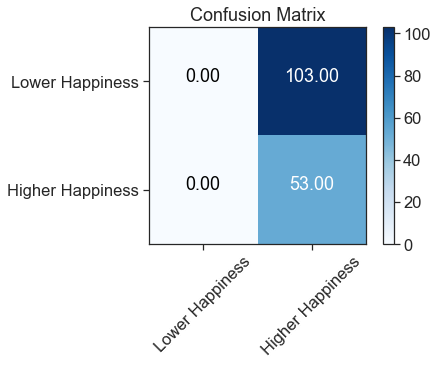

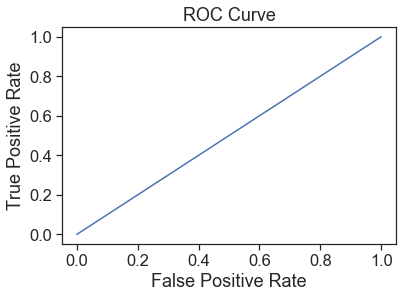

   auc  accuracy  precision  recall   model
0  0.5  0.339744        0.0     0.0  random


In [309]:
rm_metrics = model_performance_metrics(y_binary_validation, rm_predictions, 'random')

In [310]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(rm_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.5,0.339744,0.0,0.0,random


## 4.2. Decision Tree Classifier

Se definen diferentes modelos variando los hiperparámetros 'criterion' (criterio de selección de feactures root) y 'max_depth' (máxima profundidad del árbol). Luego, se entrenará cada modelo y posteriormente se compararán sus métricas. La selección del modelo con mejor performance se realizará en base a cual tenga el valor de AUC más próximo a 1.

In [196]:
# Definición de matriz de hiperparámetros.

tree_params_columns = ['criterion', 'max_depth']
tree_params_data    = [['gini',100],
                       ['gini',10],
                       ['gini',3],
                       ['entropy',100],
                       ['entropy',10],
                       ['entropy',3]]

tree_params = pd.DataFrame(tree_params_data, columns=tree_params_columns)
print(tree_params)

  criterion  max_depth
0      gini        100
1      gini         10
2      gini          3
3   entropy        100
4   entropy         10
5   entropy          3


In [197]:
# Definición de modelos y entrenamiento.

dt_metrics_models       = pd.DataFrame()
dt_predictions_by_model = np.empty((x_validation_norm.shape[0], tree_params.shape[0]), int)

for i in range(tree_params.shape[0]):
    model_params = tree_params.iloc[i]
    criterion = model_params['criterion']
    max_depth = model_params['max_depth']

    dt_model  = DecisionTreeClassifier(criterion = criterion,
                                       random_state = 100,
                                       max_depth=max_depth,
                                       min_samples_leaf=5) 

    dt_model.fit(x_train_norm, y_binary_train)
    dt_predictions                = dt_model.predict(x_validation_norm)
    dt_predictions_by_model[:, i] = dt_predictions
    dt_metrics                    = model_metrics(y_binary_validation, dt_predictions)
    dt_metrics_models             = dt_metrics_models.append(dt_metrics, ignore_index = True) 

dt_metrics_models

,auc,accuracy,precision,recall
0,0.842828,0.858974,0.893204,0.893204
1,0.842828,0.858974,0.893204,0.893204
2,0.804268,0.814103,0.877551,0.834951
3,0.819930,0.858974,0.858407,0.941748
4,0.819930,0.858974,0.858407,0.941748
5,0.789705,0.794872,0.873684,0.805825


In [198]:
# Selección de modelo con AUC más alto.

max_auc = max(dt_metrics_models['auc'])
max_auc_idx = dt_metrics_models.index[dt_metrics_models['auc'] == max_auc].to_numpy()
print('Parámetros del modelo Decision Tree Classifier que tiene el mayor valor de AUC:')
tree_params.iloc[max_auc_idx]

Parámetros del modelo Decision Tree Classifier que tiene el mayor valor de AUC:


,criterion,max_depth
0,gini,100
1,gini,10


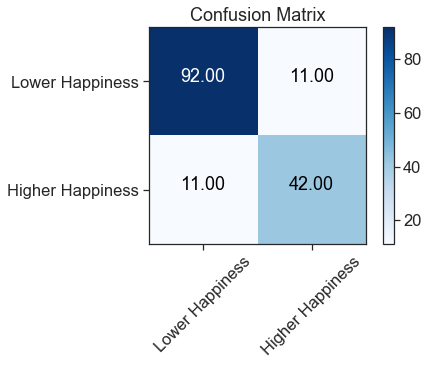

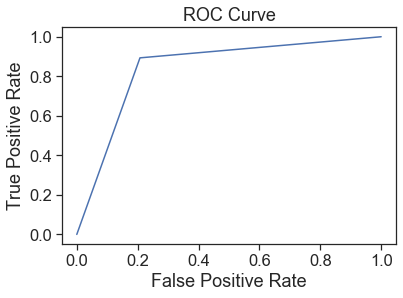

        auc  accuracy  precision    recall                     model
0  0.842828  0.858974   0.893204  0.893204  decision_tree_classifier


In [311]:
# Visualización de métricas, matriz de confiusión y curva ROC del modelo seleccionado

dt_metrics = model_performance_metrics(y_binary_validation, dt_predictions_by_model[:,max_auc_idx[0]], 
                                       'decision_tree_classifier')

In [312]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(dt_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier


## 4.3. Random Forest

Se definen diferentes modelos variando el hiperparámetro 'n_estimators' (cantidad de árboles en considerados). Luego, se entrenará cada modelo y posteriormente se compararán sus métricas. La selección del modelo con mejor performance se realizará en base a cual tenga el valor de AUC más próximo a 1.

In [202]:
# Definición de matriz de hiperparámetros.

rf_params_columns = ['n_estimators']
rf_params_data    = [[2000],
                     [1000],
                     [500],
                     [100],
                     [50],
                     [10]]

rf_params = pd.DataFrame(rf_params_data, columns=rf_params_columns)
print(rf_params)

   n_estimators
0          2000
1          1000
2           500
3           100
4            50
5            10


In [203]:
# Definición de modelos y entrenamiento.

rf_metrics_models = pd.DataFrame()
rf_predictions_by_model = np.empty((x_validation_norm.shape[0], rf_params.shape[0]), int)

for i in range(rf_params.shape[0]):
    model_params = rf_params.iloc[i]
    n_estimators = model_params['n_estimators']
    
    rf_model = RandomForestClassifier(random_state      = 1,
                                      n_estimators      = n_estimators,
                                      min_samples_split = 2,
                                      min_samples_leaf  = 1,
                                      n_jobs            = 1,
                                      criterion         = 'gini'
                                     )

    rf_model.fit(x_train_norm, y_binary_train)
    rf_predictions                = rf_model.predict(x_validation_norm)    
    rf_predictions_by_model[:, i] = rf_predictions
    rf_metrics                    = model_metrics(y_binary_validation, rf_predictions)
    rf_metrics_models             = rf_metrics_models.append(rf_metrics, ignore_index = True) 

rf_metrics_models

,auc,accuracy,precision,recall
0,0.890548,0.903846,0.923077,0.932039
1,0.890548,0.903846,0.923077,0.932039
2,0.881114,0.897436,0.914286,0.932039
3,0.895402,0.910256,0.923810,0.941748
4,0.881114,0.897436,0.914286,0.932039
5,0.895127,0.903846,0.931373,0.922330


In [248]:
# Selección de modelo con AUC más alto.

max_auc = max(rf_metrics_models['auc'])
max_auc_idx = rf_metrics_models.index[rf_metrics_models['auc'] == max_auc].to_numpy()
print('Parámetros del modelo Random Forest que tiene el mayor valor de AUC:')
rf_params.iloc[max_auc_idx]

Parámetros del modelo Random Forest que tiene el mayor valor de AUC:


,n_estimators
3,100


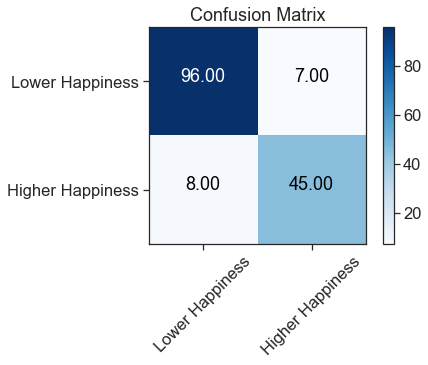

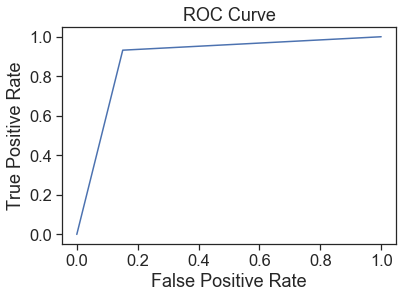

        auc  accuracy  precision    recall          model
0  0.890548  0.903846   0.923077  0.932039  random_forest


In [313]:
# Visualización de métricas, matriz de confiusión y curva ROC del modelo seleccionado.

rf_metrics = model_performance_metrics(y_binary_validation, rf_predictions_by_model[:,max_auc_idx],
                                       'random_forest')

In [314]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(rf_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
2,0.890548,0.903846,0.923077,0.932039,random_forest


Es importante mencionar que mediante al algoritmo Random Forest se puede evaluar la importancia de las feactures, de acuerdo a la selección de parámetros que este realiza.

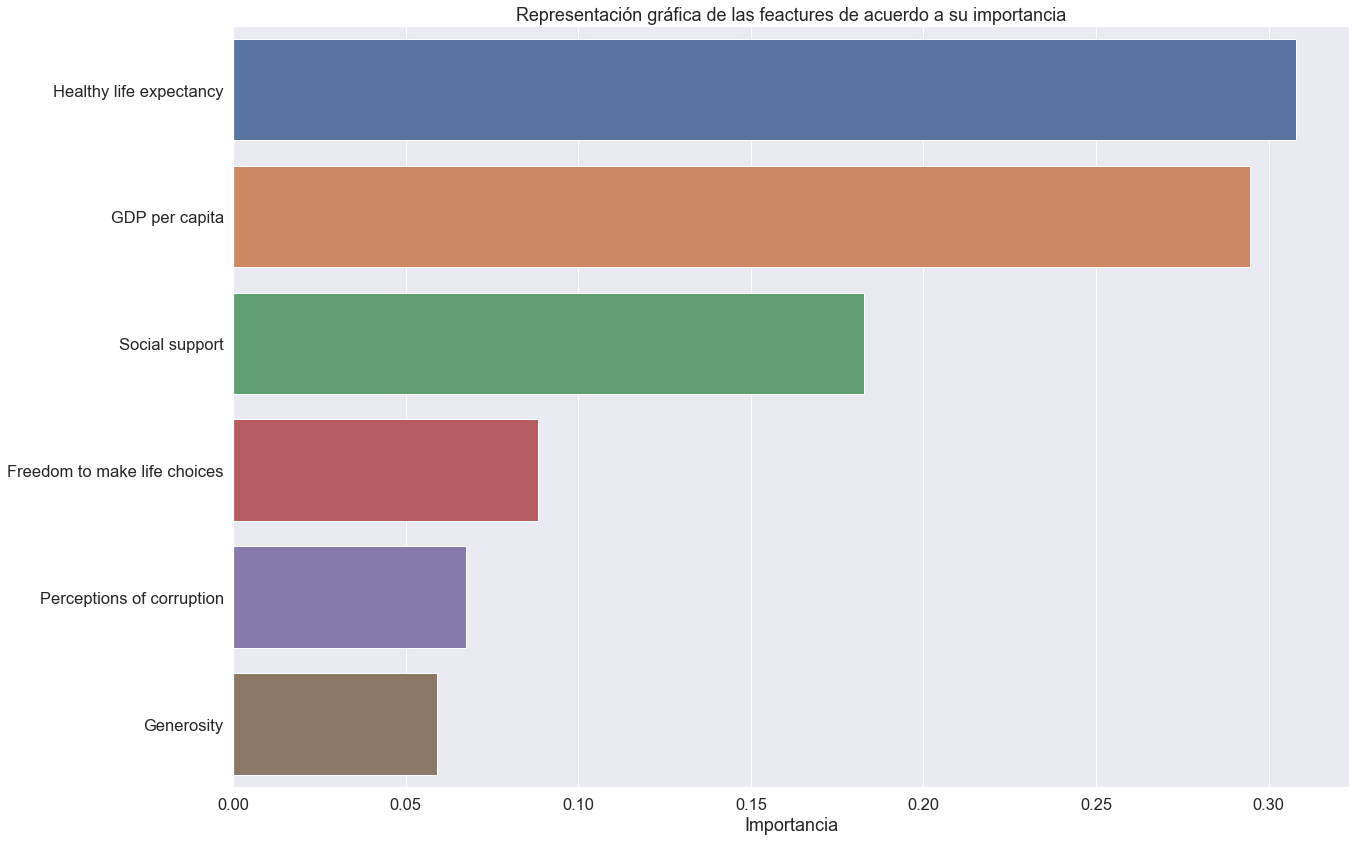

In [207]:
# Análisis de la importancia de las feactures utilizando Random Forest

feature_columns = final_dataset.columns

feature_imp = pd.Series(rf_model.feature_importances_,index=feature_columns).sort_values(ascending=False)

plt.figure(figsize=(20,14))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importancia')
plt.title("Representación gráfica de las feactures de acuerdo a su importancia")
plt.show()

El gráfico anterior es consistente con los resultados observados en el análisis de la correlación cruzada enter la entrada y la salida. Puede verse que las fectures mas importantes son las mismas que las que se determinó a partir del heatmap:
- GDP per capita
- Healthy life expectancy
- Social support    

## 4.4. Regresión logísica

Se definen diferentes modelos variando los hiperparámetros 'solver' y 'C'. Luego, se entrenará cada modelo y posteriormente se compararán sus métricas. La selección del modelo con mejor performance se realizará en base a cual tenga el valor de AUC más próximo a 1.

In [209]:
# Definición de matriz de hiperparámetros.

lr_params_columns = ['solver', 'C']
lr_params_data    = [['newton-cg', 1],
                     ['lbfgs', 1],
                     ['liblinear', 1],
                     ['sag', 1],
                     ['saga', 1],
                     ['newton-cg', 0.1],
                     ['lbfgs', 0.1],
                     ['liblinear', 0.1],
                     ['sag', 0.1],
                     ['saga', 0.1],
                     ['newton-cg', 0.01],
                     ['lbfgs', 0.01],
                     ['liblinear', 0.01],
                     ['sag', 0.01],
                     ['saga', 0.01]]

lr_params = pd.DataFrame(lr_params_data, columns=lr_params_columns)
print(lr_params)

       solver     C
0   newton-cg  1.00
1       lbfgs  1.00
2   liblinear  1.00
3         sag  1.00
4        saga  1.00
5   newton-cg  0.10
6       lbfgs  0.10
7   liblinear  0.10
8         sag  0.10
9        saga  0.10
10  newton-cg  0.01
11      lbfgs  0.01
12  liblinear  0.01
13        sag  0.01
14       saga  0.01


In [210]:
# Definición de modelos y entrenamiento.

lr_metrics_models       = pd.DataFrame()
lr_predictions_by_model = np.empty((x_validation_norm.shape[0], lr_params.shape[0]), int)

for i in range(lr_params.shape[0]):
    model_params = lr_params.iloc[i]
    solver = model_params['solver']
    C = model_params['C']
    
    lr_model = LogisticRegression(C=1, solver=solver, max_iter=1000)
    
    lr_model.fit(x_train_norm, y_binary_train)
    lr_predictions                = lr_model.predict(x_validation_norm)
    lr_predictions_by_model[:, i] = lr_predictions
    lr_metrics                    = model_metrics(y_binary_validation, lr_predictions)
    lr_metrics_models             = lr_metrics_models.append(lr_metrics, ignore_index = True) 

lr_metrics_models

,auc,accuracy,precision,recall
0,0.857666,0.884615,0.889908,0.941748
1,0.857666,0.884615,0.889908,0.941748
2,0.857666,0.884615,0.889908,0.941748
3,0.857666,0.884615,0.889908,0.941748
4,0.857666,0.884615,0.889908,0.941748
5,0.857666,0.884615,0.889908,0.941748
6,0.857666,0.884615,0.889908,0.941748
7,0.857666,0.884615,0.889908,0.941748
8,0.857666,0.884615,0.889908,0.941748
9,0.857666,0.884615,0.889908,0.941748


In [211]:
# Selección de modelo con AUC más alto.

max_auc = max(lr_metrics_models['auc'])
max_auc_idx = lr_metrics_models.index[lr_metrics_models['auc'] == max_auc].to_numpy()
print('Parámetros del modelo Decision Tree Classifier que tiene el mayor valor de AUC:')
lr_params.iloc[max_auc_idx[0]]

Parámetros del modelo Decision Tree Classifier que tiene el mayor valor de AUC:


solver    newton-cg
C                 1
Name: 0, dtype: object

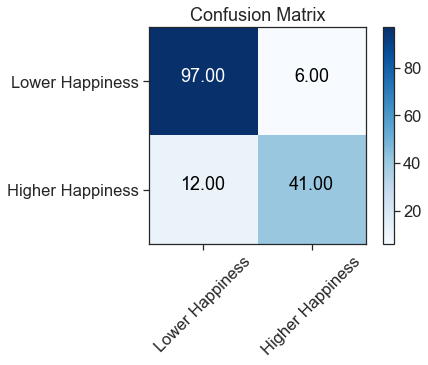

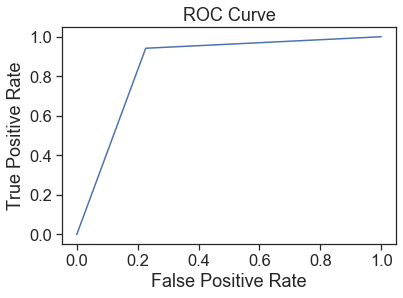

        auc  accuracy  precision    recall                model
0  0.857666  0.884615   0.889908  0.941748  logistic_regression


In [315]:
# Visualización de métricas, matriz de confiusión y curva ROC del modelo seleccionado.

lr_metrics = model_performance_metrics(y_binary_validation, lr_predictions_by_model[:,max_auc_idx[0]], 
                                       'logistic_regression')

In [316]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(lr_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
2,0.890548,0.903846,0.923077,0.932039,random_forest
3,0.857666,0.884615,0.889908,0.941748,logistic_regression


## 4.5. SVM

Se definen diferentes modelos variando el hiperparámetro 'kernel'. Luego, se entrenará cada modelo y posteriormente se compararán sus métricas. La selección del modelo con mejor performance se realizará en base a cual tenga el valor de AUC más próximo a 1.

In [215]:
# Definición de matriz de hiperparámetros.

svm_params_columns = ['kernel']
svm_params_data    = [['linear'],
                      ['poly'],
                      ['rbf'],
                      ['sigmoid']]

svm_params = pd.DataFrame(svm_params_data, columns=svm_params_columns)
print(svm_params)

    kernel
0   linear
1     poly
2      rbf
3  sigmoid


In [216]:
# Defiición de modelos y entrenamiento.

svm_metrics_models       = pd.DataFrame()
svm_predictions_by_model = np.empty((x_validation_norm.shape[0], svm_params.shape[0]), int)

for i in range(svm_params.shape[0]):
    model_params = svm_params.iloc[i]
    kernel = model_params['kernel']

    svm_model  = svm.SVC(kernel=kernel)
    
    svm_model.fit(x_train_norm, y_binary_train)
    svm_predictions                = svm_model.predict(x_validation_norm)
    svm_predictions_by_model[:, i] = svm_predictions
    svm_metrics                    = model_metrics(y_binary_validation, svm_predictions)
    svm_metrics_models             = svm_metrics_models.append(svm_metrics, ignore_index = True) 

svm_metrics_models

,auc,accuracy,precision,recall
0,0.847958,0.871795,0.887850,0.922330
1,0.866551,0.878205,0.911765,0.902913
2,0.861971,0.878205,0.903846,0.912621
3,0.256732,0.326923,0.490000,0.475728


In [268]:
# Selección de modelo con AUC más alto.

max_auc = max(svm_metrics_models['auc'])
max_auc_idx = svm_metrics_models.index[svm_metrics_models['auc'] == max_auc].to_numpy()
print('Parámetros del modelo Decision Tree Classifier que tiene el mayor valor de AUC:')
svm_params.iloc[max_auc_idx]

Parámetros del modelo Decision Tree Classifier que tiene el mayor valor de AUC:


,kernel
1,poly


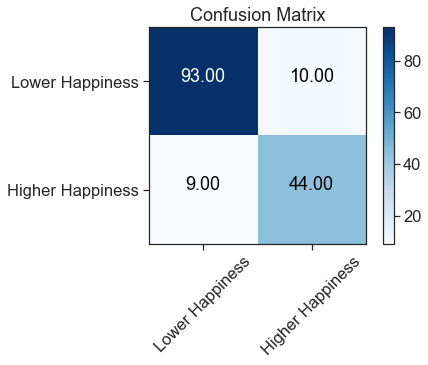

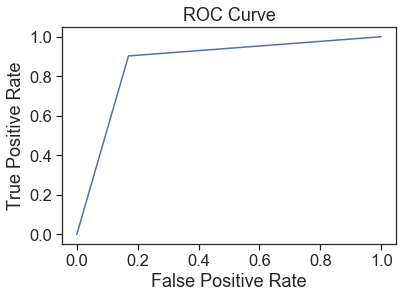

        auc  accuracy  precision    recall model
0  0.866551  0.878205   0.911765  0.902913   svm


In [317]:
# Visualización de métricas, matriz de confiusión y curva ROC del modelo seleccionado.

svm_metrics = model_performance_metrics(y_binary_validation, svm_predictions_by_model[:,max_auc_idx], 'svm')

In [318]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(svm_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
2,0.890548,0.903846,0.923077,0.932039,random_forest
3,0.857666,0.884615,0.889908,0.941748,logistic_regression
4,0.866551,0.878205,0.911765,0.902913,svm


## 4.6. Clustering 
### 4.6.1. K-Means

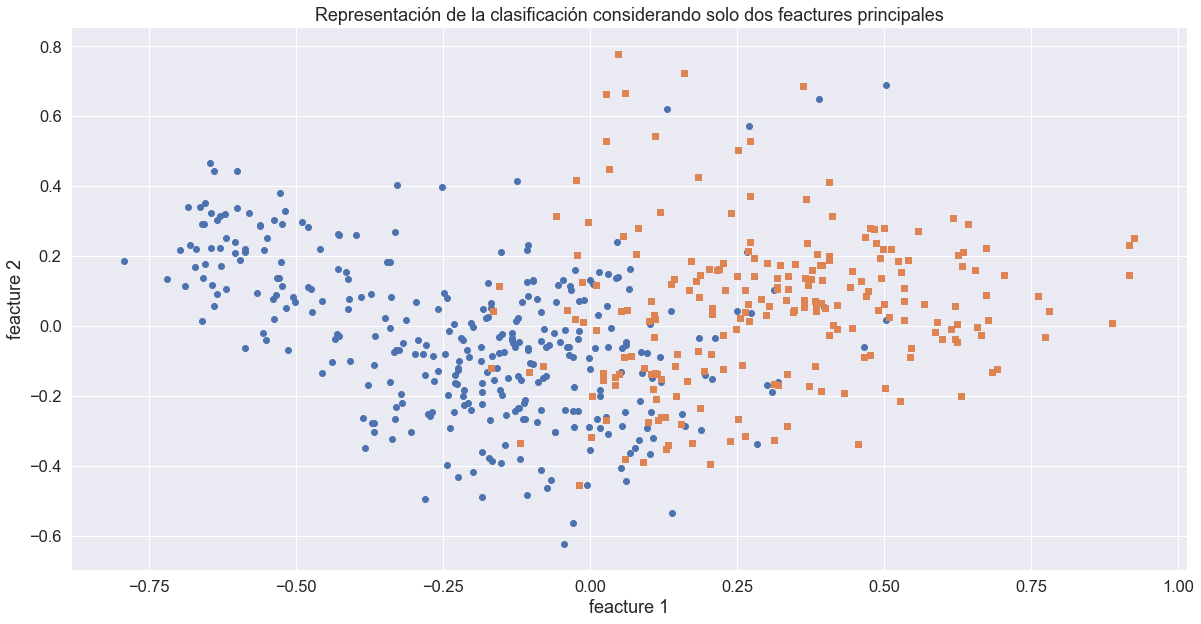

In [224]:
# Reducción de dimensiones del dataset.

pca = PCA(n_components=2)
x_train_pca      = pca.fit_transform(x_train_norm)
x_validation_pca = pca.fit_transform(x_validation_norm)
x_test_pca       = pca.fit_transform(x_test_norm)

x_train_pca_1 = x_train_pca[y_binary_train == 1]
x_train_pca_0 = x_train_pca[y_binary_train == 0]

plt.figure(figsize=(20,10))
plt.scatter(x_train_pca_1[:,0], x_train_pca_1[:,1],marker="o")
plt.scatter(x_train_pca_0[:,0], x_train_pca_0[:,1],marker="s")
plt.title('Representación de la clasificación considerando solo dos feactures principales')
plt.xlabel('feacture 1')
plt.ylabel('feacture 2')
plt.show()

In [225]:
# Función para graficar la región de desición

def plot_decision_regions(X,Y, model):
	# define bounds of the domain
    min1, max1 = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    min2, max2 = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    
    # make predictions for the grid
    yhat = model.predict(grid)
    
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    
    # plot the grid of x, y and z values as a surface
    plt.figure(figsize=(20,10))
    plt.contourf(xx, yy, zz, cmap='Paired')
    
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(Y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

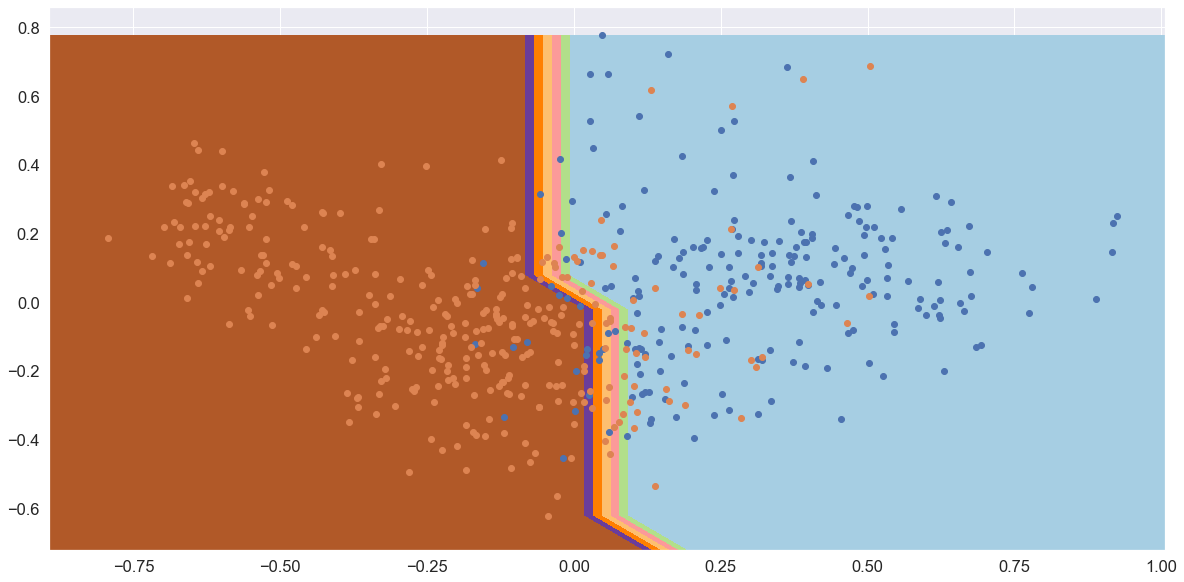

In [226]:
# K-Means

km_model = KMeans(n_clusters=2, random_state=100).fit(x_train_pca)
plot_decision_regions(x_train_pca,y_binary_train,km_model)

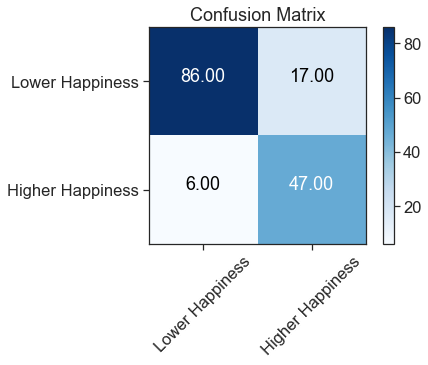

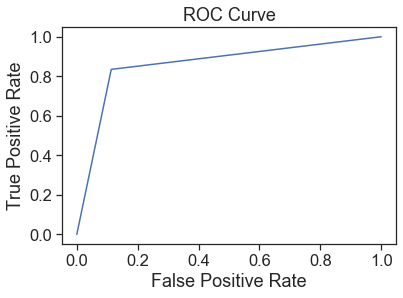

        auc  accuracy  precision    recall    model
0  0.860872  0.852564   0.934783  0.834951  k-means


In [319]:
km_predictions = km_model.predict(x_validation_pca)
km_metrics = model_performance_metrics(y_binary_validation, km_predictions, 'k-means')

In [320]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(km_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
2,0.890548,0.903846,0.923077,0.932039,random_forest
3,0.857666,0.884615,0.889908,0.941748,logistic_regression
4,0.866551,0.878205,0.911765,0.902913,svm
5,0.860872,0.852564,0.934783,0.834951,k-means


## 4.7. Redes Neuronales
### 4.7.1. Multi Layer Perceptron

Se definen diferentes modelos variando los hiperparámetros 'lr' (learning rate) y 'hidden_layer_sizes' (arquitectura interna de la red). Luego, se entrenará cada modelo y posteriormente se compararán sus métricas. La selección del modelo con mejor performance se realizará en base a cual tenga el valor de AUC más próximo a 1.

In [229]:
# Definición de matriz de hiperparámetros.

rn_params_columns = ['lr', 'hidden_layer_sizes']
rn_params_data    = [[0.001, (128, 8, 2)],
                     [0.001, (64, 4, 2)],
                     [0.001, (128, 2)],
                     [0.001, (8, 2)],
                     [0.1, (128, 8, 2)],
                     [0.1, (64, 4, 2)],
                     [0.1, (128, 2)],
                     [0.1, (8, 2)],
                     [0.00001, (128, 8, 2)],
                     [0.00001, (64, 4, 2)],
                     [0.00001, (128, 2)],
                     [0.00001, (8, 2)]]
                     
rn_params = pd.DataFrame(rn_params_data, columns=rn_params_columns)
print(rn_params)

         lr hidden_layer_sizes
0   0.00100        (128, 8, 2)
1   0.00100         (64, 4, 2)
2   0.00100           (128, 2)
3   0.00100             (8, 2)
4   0.10000        (128, 8, 2)
5   0.10000         (64, 4, 2)
6   0.10000           (128, 2)
7   0.10000             (8, 2)
8   0.00001        (128, 8, 2)
9   0.00001         (64, 4, 2)
10  0.00001           (128, 2)
11  0.00001             (8, 2)


In [230]:
# Definición de modelos y entrenamiento.

rn_metrics_models       = pd.DataFrame()
rn_predictions_by_model = np.empty((x_validation_norm.shape[0], rn_params.shape[0]), int)

for i in range(rn_params.shape[0]):
    model_params       = rn_params.iloc[i]
    lr                 = model_params['lr']
    hidden_layer_sizes = model_params['hidden_layer_sizes']
    
    rn_model = MLPClassifier(solver='sgd', 
                             alpha=lr,
                             hidden_layer_sizes=hidden_layer_sizes, 
                             random_state=1,
                             max_iter=2000)
    
    rn_model.fit(x_train_norm, y_binary_train)
    rn_predictions                = rn_model.predict(x_validation_norm)
    rn_predictions_by_model[:, i] = rn_predictions
    rn_metrics                    = model_metrics(y_binary_validation, rn_predictions)
    rn_metrics_models             = rn_metrics_models.append(rn_metrics, ignore_index = True) 

rn_metrics_models

,auc,accuracy,precision,recall
0,0.857391,0.878205,0.896226,0.922330
1,0.871680,0.891026,0.905660,0.932039
2,0.857391,0.878205,0.896226,0.922330
3,0.895127,0.903846,0.931373,0.922330
4,0.857391,0.878205,0.896226,0.922330
5,0.871680,0.891026,0.905660,0.932039
6,0.862246,0.884615,0.897196,0.932039
7,0.885693,0.897436,0.922330,0.922330
8,0.857391,0.878205,0.896226,0.922330
9,0.871680,0.891026,0.905660,0.932039


In [231]:
# Selección de modelo con AUC más alto.

max_auc = max(rn_metrics_models['auc'])
max_auc_idx = rn_metrics_models.index[rn_metrics_models['auc'] == max_auc].to_numpy()
print('Parámetros del modelo Decision Tree Classifier que tiene el mayor valor de AUC:')
rn_params.iloc[max_auc_idx]

Parámetros del modelo Decision Tree Classifier que tiene el mayor valor de AUC:


,lr,hidden_layer_sizes
3,0.00100,"(8, 2)"
11,0.00001,"(8, 2)"


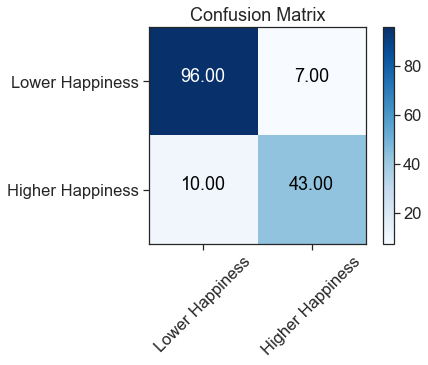

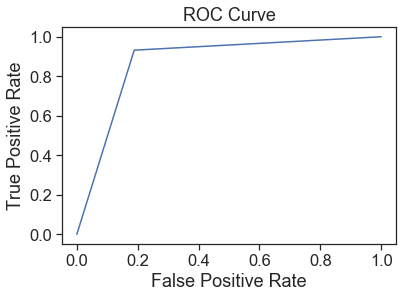

       auc  accuracy  precision    recall             model
0  0.87168  0.891026    0.90566  0.932039  neuronal_network


In [321]:
# Visualización de métricas, matriz de confiusión y curva ROC del modelo seleccionado.

rn_metrics = model_performance_metrics(y_binary_validation, rn_predictions_by_model[:,max_auc_idx[0]], 'neuronal_network')

In [322]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(rn_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
2,0.890548,0.903846,0.923077,0.932039,random_forest
3,0.857666,0.884615,0.889908,0.941748,logistic_regression
4,0.866551,0.878205,0.911765,0.902913,svm
5,0.860872,0.852564,0.934783,0.834951,k-means
6,0.871680,0.891026,0.905660,0.932039,neuronal_network


## 4.8. Ensables
Tipos de modelos considerado:
    1. Bagging
    2. Boosting
    3. XGBoost

### 4.8.1. Bagging

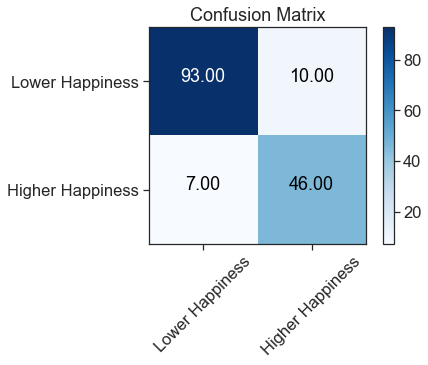

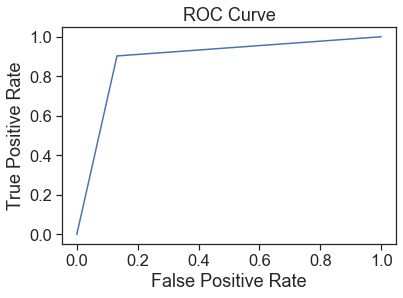

        auc  accuracy  precision    recall             model
0  0.885419  0.891026       0.93  0.902913  ensamble_bagging


In [323]:
bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                              bootstrap_features=False, 
                              n_estimators= 1000, 
                              n_jobs = -1)

bag_model.fit(x_train_norm, y_binary_train)
bag_predictions = bag_model.predict(x_validation_norm)
bag_metrics = model_performance_metrics(y_binary_validation, bag_predictions, 'ensamble_bagging')

In [324]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(bag_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
2,0.890548,0.903846,0.923077,0.932039,random_forest
3,0.857666,0.884615,0.889908,0.941748,logistic_regression
4,0.866551,0.878205,0.911765,0.902913,svm
5,0.860872,0.852564,0.934783,0.834951,k-means
6,0.871680,0.891026,0.905660,0.932039,neuronal_network
7,0.885419,0.891026,0.930000,0.902913,ensamble_bagging


### 4.8.2. Boosting

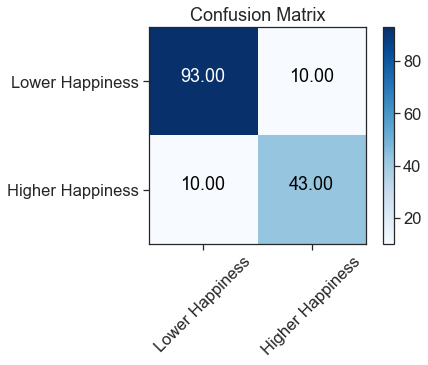

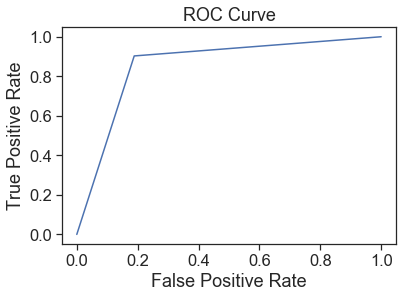

        auc  accuracy  precision    recall              model
0  0.857117  0.871795   0.902913  0.902913  ensamble_boosting


In [325]:
boo_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                               algorithm='SAMME', 
                               n_estimators=1000)

boo_model.fit(x_train_norm, y_binary_train)
boo_predictions = boo_model.predict(x_validation_norm)

boo_metrics = model_performance_metrics(y_binary_validation, boo_predictions, 'ensamble_boosting')

In [326]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(boo_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
2,0.890548,0.903846,0.923077,0.932039,random_forest
3,0.857666,0.884615,0.889908,0.941748,logistic_regression
4,0.866551,0.878205,0.911765,0.902913,svm
5,0.860872,0.852564,0.934783,0.834951,k-means
6,0.871680,0.891026,0.905660,0.932039,neuronal_network
7,0.885419,0.891026,0.930000,0.902913,ensamble_bagging
8,0.857117,0.871795,0.902913,0.902913,ensamble_boosting


### 4.8.3. XGBoost

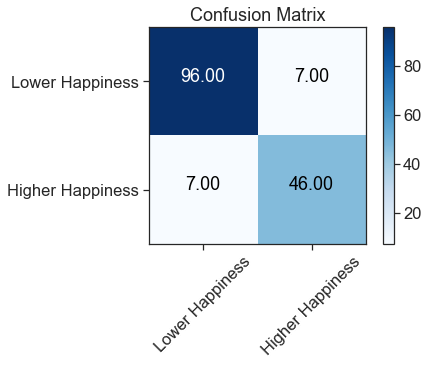

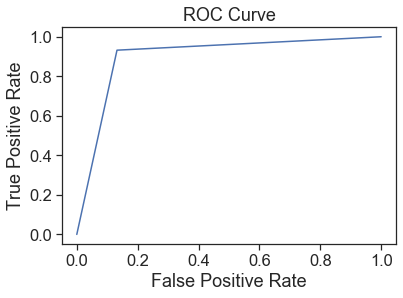

        auc  accuracy  precision    recall             model
0  0.899982  0.910256   0.932039  0.932039  ensamble_xgboost


In [327]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train_norm, y_binary_train)
xgb_predictions = xgb_model.predict(x_validation_norm)

xgb_metrics = model_performance_metrics(y_binary_validation, xgb_predictions, 'ensamble_xgboost')

In [328]:
# Se almacenan las métricas del modelo para realizar su posterior comparación contra las de los otros modelos considerados

metrics_all_models = metrics_all_models.append(xgb_metrics, ignore_index = True)
metrics_all_models

,auc,accuracy,precision,recall,model
0,0.500000,0.339744,0.000000,0.000000,random
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
2,0.890548,0.903846,0.923077,0.932039,random_forest
3,0.857666,0.884615,0.889908,0.941748,logistic_regression
4,0.866551,0.878205,0.911765,0.902913,svm
5,0.860872,0.852564,0.934783,0.834951,k-means
6,0.871680,0.891026,0.905660,0.932039,neuronal_network
7,0.885419,0.891026,0.930000,0.902913,ensamble_bagging
8,0.857117,0.871795,0.902913,0.902913,ensamble_boosting
9,0.899982,0.910256,0.932039,0.932039,ensamble_xgboost


## 5. Evaluacion de la calidad de las predicciones

A continuación se muestra en forma comparativa las métricas correspondiente a cada uno de los modelos considerados. Los modelos se ordenan de acuerdo a su valor de AUC en forma decreciente.

In [329]:
metrics_all_models.sort_values(by="auc", ascending=False)

,auc,accuracy,precision,recall,model
9,0.899982,0.910256,0.932039,0.932039,ensamble_xgboost
2,0.890548,0.903846,0.923077,0.932039,random_forest
7,0.885419,0.891026,0.930000,0.902913,ensamble_bagging
6,0.871680,0.891026,0.905660,0.932039,neuronal_network
4,0.866551,0.878205,0.911765,0.902913,svm
5,0.860872,0.852564,0.934783,0.834951,k-means
3,0.857666,0.884615,0.889908,0.941748,logistic_regression
8,0.857117,0.871795,0.902913,0.902913,ensamble_boosting
1,0.842828,0.858974,0.893204,0.893204,decision_tree_classifier
0,0.500000,0.339744,0.000000,0.000000,random


Como puede observarse, el modelo mejor performance en términos de la métrica AUC es el correspondiente al ensamble XGBoost, seguido por el Random Forest y por el ensamble.

## 6. Conclusiones

Para todos los modelos evaluados se encontró valores de AUC definidos en el rango [0.84; 0.90]. Si bien las métricas obtenidas fueron buenas, es probable que modelos deep learning presenten mejor performance. En particular, sería interesante evaluar la perfomance de un modelo funcional de deep learning que utilice las feactures correspiendientes al país o región y al año considerado, para aprender embeddings y analizar como se comporta el clasificador.